<img src="https://drive.google.com/uc?id=1iN15NbDTTX1csY_kGnQT-JSRuxZXEZYQ" width="900" align="center">


# **Predicting Term Deposit Subscriptions with Bank Marketing Dataset**

Team 6: Jiali Zhang, Amrit Abhilash, Prawina Sriwidya, Georges Petitpas, Glen Miles






### **◎ Project information**




**Data sources:**
https://www.kaggle.com/janiobachmann/bank-marketing-dataset
This is a bank marketing dataset uploaded originally in the UCI Machine Learning Repository. It is 897.42 KB in size, and includes 17 columns and 11162 rows. It provides information about a marketing campaign of a financial institution in which we can find insights to improve the firm’s future marketing campaigns.

**Project goals:**
1.   Perform exploratory data analysis and find the relationships between clients’ deposit amount and their age, marital status, jobs, education level, previous campaign results, etc. 
2.   Build machine learning models to predict term deposit subscriptions in the bank. It will be supervised machine learning and our model will try to solve the classification problem - whether a client will subscribe to the term deposit in the bank or not. 

By analyzing the dataset, we can divide customer segments, identify who is more likely to subscribe to the term deposit product, and thus help the bank to develop more targeted marketing campaigns in the future.


**Sections:**


> Section 1) Set up environment and load data

> Section 2) Data preparation

> Section 3) Exploratory Data Analysis

> Section 4) Machine learning

> Section 5) Summary




## **1. Set up environment and load data**

In [49]:
#!pip install git+https://github.com/mwaskom/seaborn.git

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings

sns.set_theme(color_codes=True)

bank = pd.read_csv("https://raw.githubusercontent.com/Androzhang/Course_project_Bank_data_EDA/main/bank.csv")


In [51]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [52]:
bank.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## **2. Data preparation**

Check the data completeness, handle missing data and null values, merge duplicates, convert data types as needed and create a data dictionary to show the function of different columns. The processed dataset will be used for the following steps.

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


This dataset is clean and has no obvious null value.

In [54]:
bank.shape

(11162, 17)

In [55]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**About Data**

In [56]:
#Check object coloumn info
for c in bank.select_dtypes(include='object').columns:
  print(c)
  print(bank[c].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


**Data Dictionary**

Feature

1. age | int64 | age in numbers
2. job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
3. marital | object | marital status (categorical: ['married' 'single' 'divorced'])
4. education | object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
5. default | object | has credit in default? (categorical: ['no' 'yes'])
6. balance | int64 | Balance of the individual
7. housing | object | has housing loan? (categorical: ['yes' 'no'])
8. loan | object | has personal loan? (categorical: ['no' 'yes'])
9. contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
10. day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
12. duration | int64 | last contact duration, in seconds (numeric)
13. campaign | int64 | number of contacts performed during this campaign and for this client
14. pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous | int64 | number of contacts performed before this campaign and for this client
16. poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

Label

1. deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

## **3.Exploratory Data Analysis**

In this step, we will bring up some interesting and meaningful exploratory questions based on our dataset. (e.g. the relationships between clients’ deposit amount and their age, marital status, education level, housing and loan status, etc. )
Then we will use Python to answer those questions. Also our analysis results will be visualized in forms of tables/graphs/charts with Python Matplotlib and Seaborn.


### 3.1 Comparison of term deposit by age
What is the peak age to have deposit? Which age group of clients should we target in marketing？


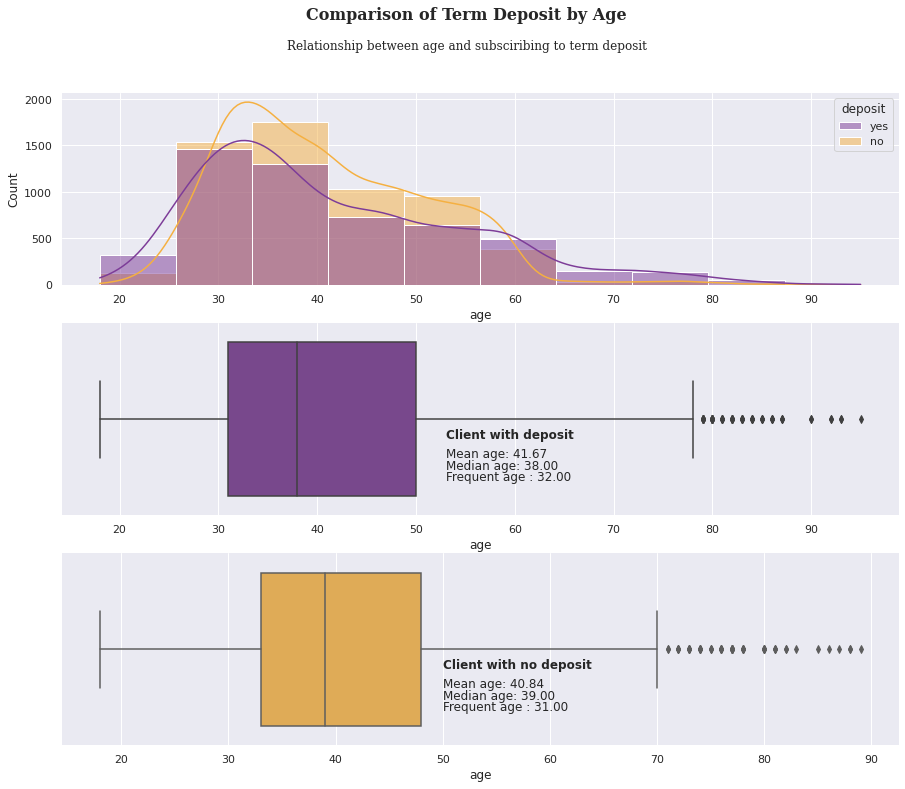

In [58]:
fig=plt.figure(figsize=(15,12), edgecolor='black')
plt.suptitle("Comparison of Term Deposit by Age", family='Serif', size=16, weight='bold')
plt.figtext(0.5,0.93,"Relationship between age and subsciribing to term deposit", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=3, ncols=2, figure=fig)

ax1=plt.subplot(gs[0,:2])
sns.histplot(data=bank, x='age', bins=10, ax=ax1, kde=True, hue='deposit', multiple='layer', element='bars', palette=['#7D3C98','#F5B041']);

ax2=plt.subplot(gs[1,:2])
sns.boxplot(data=bank[bank['deposit']=='yes'], x='age', ax=ax2, palette=['#7D3C98']);
ax2.text(53,0.10,"Client with deposit", weight='bold')
ax2.text(53,0.20,"Mean age: {:.2f}".format(bank[bank['deposit']=='yes']['age'].mean()))
ax2.text(53,0.26,"Median age: {:.2f}".format(bank[bank['deposit']=='yes']['age'].median()))
ax2.text(53,0.32,"Frequent age : {:.2f}".format(bank[bank['deposit']=='yes']['age'].mode().max()))

ax3=plt.subplot(gs[2,:2])
sns.boxplot(data=bank[bank['deposit']!='yes'], x='age', ax=ax3, palette=['#F5B041']);
ax3.text(50,0.10,"Client with no deposit", weight='bold')
ax3.text(50,0.20,"Mean age: {:.2f}".format(bank[bank['deposit']!='yes']['age'].mean()))
ax3.text(50,0.26,"Median age: {:.2f}".format(bank[bank['deposit']!='yes']['age'].median()))
ax3.text(50,0.32,"Frequent age : {:.2f}".format(bank[bank['deposit']!='yes']['age'].mode().max()))

for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

**Obsevation:**
People start to deposit from the age of 20. Those between 30 and 50 are the principle group of clients who are more likely to have deposit, especially the 32-year-old clients. However, the non-deposit group is also located in a similar range.

### 3.2 Impact of marital status on account balance and term deposit
3.2.1 What is the relationship between age, marital status and account balance?

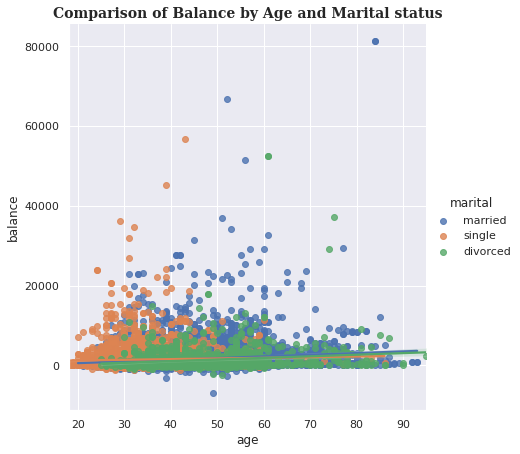

In [59]:
sns.lmplot(x="age", y="balance", data=bank, height=6, hue='marital')
plt.title("Comparison of Balance by Age and Marital status", family='Serif', size=14, weight='bold')
plt.show();

In [60]:
bank.groupby('marital')['balance'].mean()

marital
divorced    1371.835267
married     1599.927570
single      1457.255259
Name: balance, dtype: float64

**Obsevation:**
Most of the higher balance belong to the married group of clients, and they have higher mean value of account balance. 

3.2.2 What is the relationship between marital status and term  deposit?

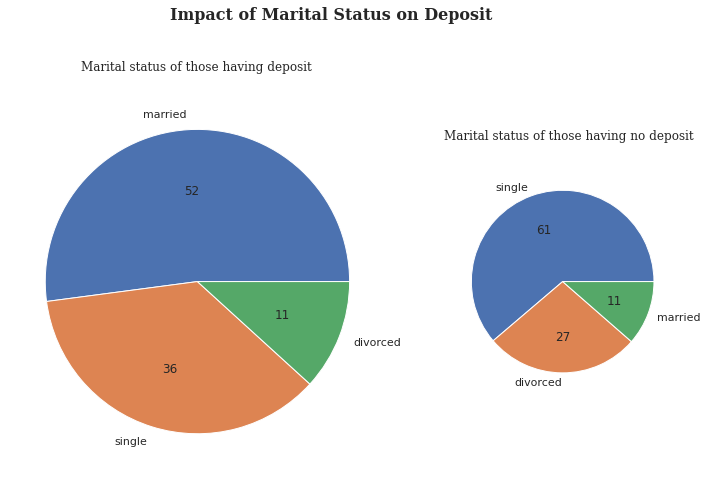

In [61]:
fig = plt.figure(figsize=(12,8))
plt.suptitle("Impact of Marital Status on Deposit", family='Serif', size=16, ha='center', weight='bold')
gs = GridSpec(nrows=1, ncols=2, width_ratios=[5,3])

ax1=plt.subplot(gs[0,0])
ax1=plt.pie(bank[bank['deposit']=='yes']['marital'].value_counts(), labels=bank[bank['deposit']=='yes']['marital'].unique(), autopct='%2d')
plt.figtext(0.21,0.87,'Marital status of those having deposit', family='Serif', size=12)

ax2=plt.subplot(gs[0,1])
ax2=plt.pie(bank[bank['deposit']=='no']['marital'].value_counts(), labels=bank[bank['deposit']=='no']['marital'].unique(), autopct='%2d')
plt.figtext(0.63,0.75,'Marital status of those having no deposit', family='Serif', size=12)

plt.show()

**Observation:** Married clients are more likely to have deposit, while the single and divorced clients are generally less likely to have deposit.

### 3.3 Impact of occupation on account balance and term deposit
What’s the relationship between occupation types and term deposit?


In [62]:
bank_sort = bank.groupby(['job'],as_index=False).agg({'balance': "sum"}).sort_values(by='balance', ascending=False)
bank_sort

,job,balance
4,management,4602541
9,technician,2837125
1,blue-collar,2340433
5,retired,1880621
0,admin.,1595286
7,services,997921
6,self-employed,755476
8,student,540282
2,entrepreneur,531997
10,unemployed,469355


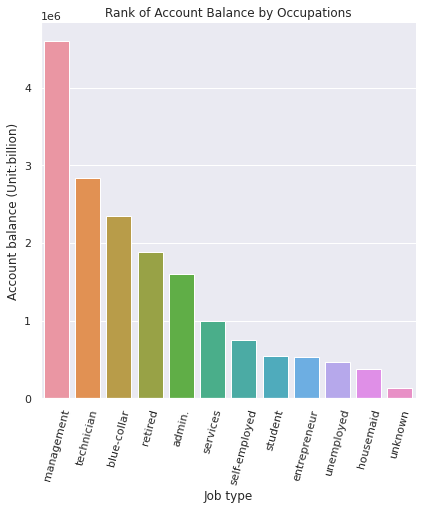

In [63]:
# fig = plt.figure(figsize=(12,8))
sns.catplot(data=bank_sort, x="job", y="balance", kind="bar", height=6)
plt.title("Rank of Account Balance by Occupations")
plt.xlabel("Job type")
plt.ylabel("Account balance (Unit:billion)")
plt.xticks(rotation=75)
plt.show()

**Observation:** The management job clients generally have hight account balance, follows by technician, blue-collar and retired clients; while unemployed and housemaid have significantly less account balance.

### 3.4 Impact of education level on account balance and term deposit
What’s the relationship between education level and term deposit?


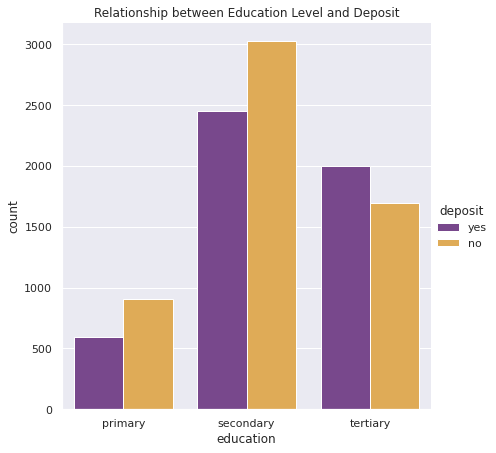

In [64]:
graph = sns.catplot(x = 'education', hue= 'deposit', data = bank[(bank["education"] !="unknown")], kind = 'count', order = ['primary', 'secondary', 'tertiary'], height=6, palette=['#7D3C98','#F5B041'])
plt.title("Relationship between Education Level and Deposit")
plt.show();

**Observation:** Secondary education receivers are the bank's principle clients. The deposit rate for secondary education is the highest. The bank ight conclude that less-educated people earn less and the tertiary-educated people have spent their savings on education.

### 3.5 Relationship between campaign and deposit
What is the relationship, if any, between the number of marketing campaign contacts and a customer subscribing to a term deposit?

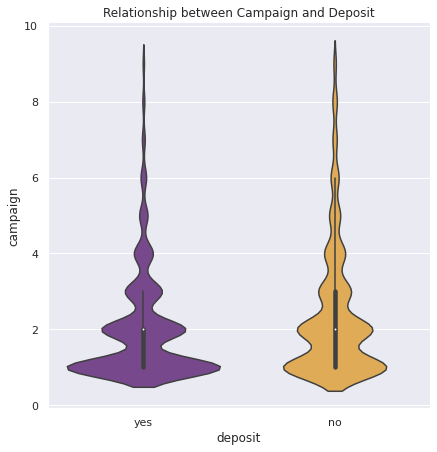

In [65]:
new_campaign = bank[bank['campaign'] < 10] # Remove outliers to get a better sense of the data
sns.catplot(x="deposit", y="campaign", kind="violin", data=new_campaign, height=6, palette=['#7D3C98','#F5B041'])
plt.title("Relationship between Campaign and Deposit");

**Observation:** The distribution of campaign contacts for people who subscribed and did not subscibe appears nearly identical. Therefore, it does not seem that the number of campaign contacts correlates with the likelihood of making a deposit.

### 3.5 Deposit campaign result by month and contact type 
Which month results in the greatest number of term deposit successes broken out by contact type?

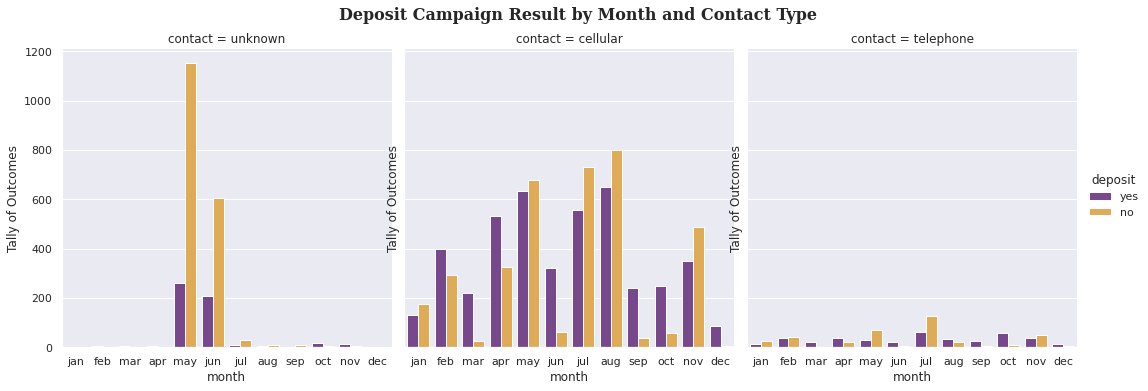

In [66]:
g = sns.catplot(x="month", kind="count", hue='deposit', data=bank, col= 'contact', order= ["jan","feb","mar","apr","may","jun", "jul", "aug", "sep", "oct", "nov","dec"], palette=['#7D3C98','#F5B041']);
g.set(ylabel='Tally of Outcomes')
plt.figtext(0.5,1.0,"Deposit Campaign Result by Month and Contact Type", family='Serif', size=16, ha='center', weight='bold')
plt.show();


**Observation:** As displayed in the charts, the greatest number of deposits are obtained in August through cellular contact. However, measured by the ratio of receiving a deposit versus not receiving a deposit, March, September, or October had the highest success rate for the number of calls placed. The success rate may convince the bank that the frequency of calls each month should be reallocated to the months with higher success ratios to increase efficiency.

### 3.6 Deposit campaign result by call durations

3.6.1 How long do average calls last in previous campaigns?

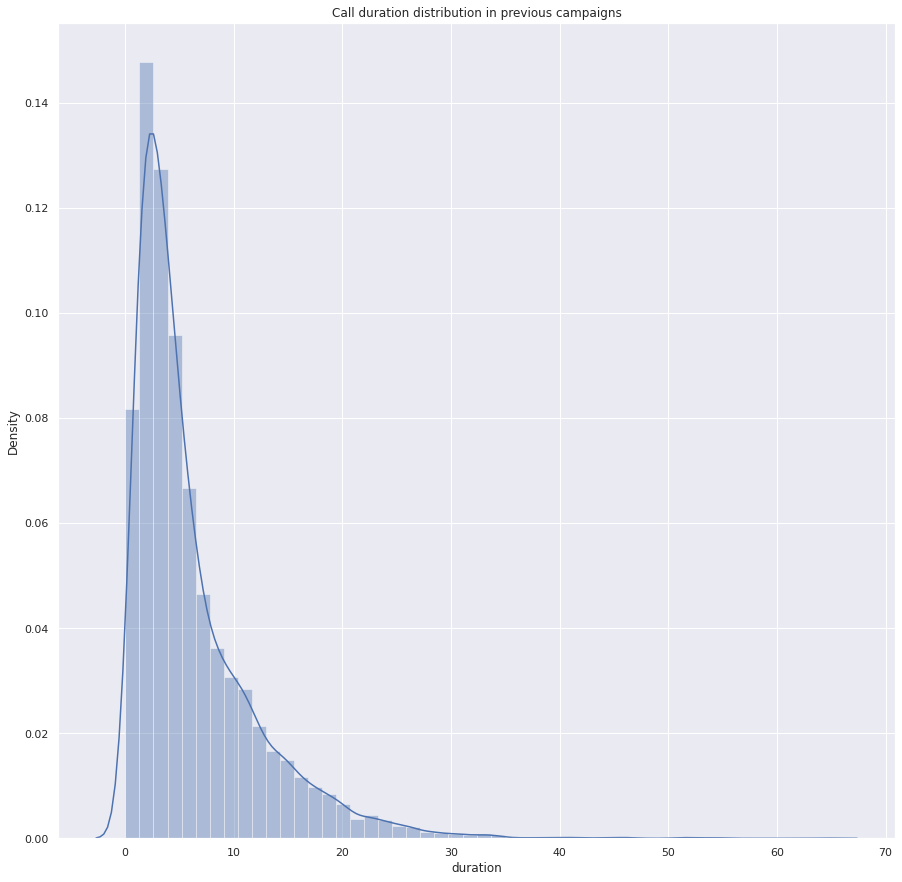

In [67]:
bank['duration'] = bank['duration']/60 #Convert duration unit from seconds to minutes
sns.distplot(bank['duration'])
plt.title("Call duration distribution in previous campaigns")
warnings.simplefilter(action='ignore', category=FutureWarning);

**Observations:**
Most calls last around 2-8 minutes. Distribution is right shifted, implying some calls last a long duration where the customer was interested and needed convincing.



3.6.2 For customers who were contacted by a previous campaign and the campaign resulted in failure for that customer, how long should contact be within this campaign to solicit a deposit?

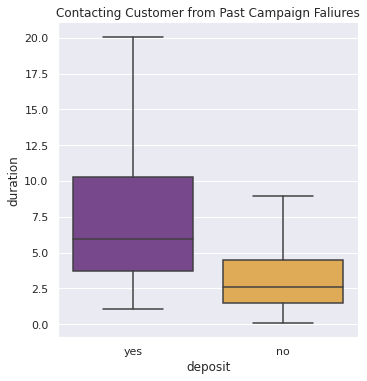

In [68]:
bank3 = bank[((bank["contact"] !="unknown") & (bank["previous"] > 0 ) & (bank["poutcome"] == "failure") )]
sns.catplot(x="deposit", y="duration", data=bank3, kind = "box", showfliers = False, palette=['#7D3C98','#F5B041'])
plt.title("Contacting Customer from Past Campaign Faliures");

**Observation:** Filtering for customers who were considered failures for the bank in previous campaigns, the bank can observe that those customers are more likely to deposit in the current campaign if their contact duration is between 3 and 10 minutes.

### 3.7 Feature heatmap
What features of the dataset are correlated?

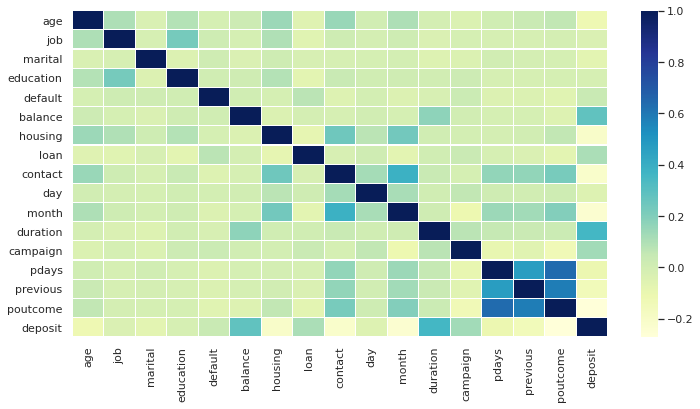

In [69]:
plt.figure(figsize=(12, 6))
corr = bank.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

**Observation:** It seems that few of the features in this dataset are highly correlated. The features that are highly correlated are pdays with previous, pdays with poutcome, and poutcome and previous. Deposit is somewhat correlated with balance and duration. 

## **4. Machine learning**

### 4.1 Preprocessing

In [70]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,17.366667,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,24.450000,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,23.150000,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,9.650000,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,11.216667,2,-1,0,unknown,yes


In [71]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [72]:
from sklearn import preprocessing
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
bank_dm = bank.apply(le.fit_transform)
bank_dm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [73]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(bank_dm)

# 3. Transform
onehotlabels = enc.transform(bank_dm).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(11162, 5928)

Text(0.5, 1.0, 'Multicollinearity heatmap')

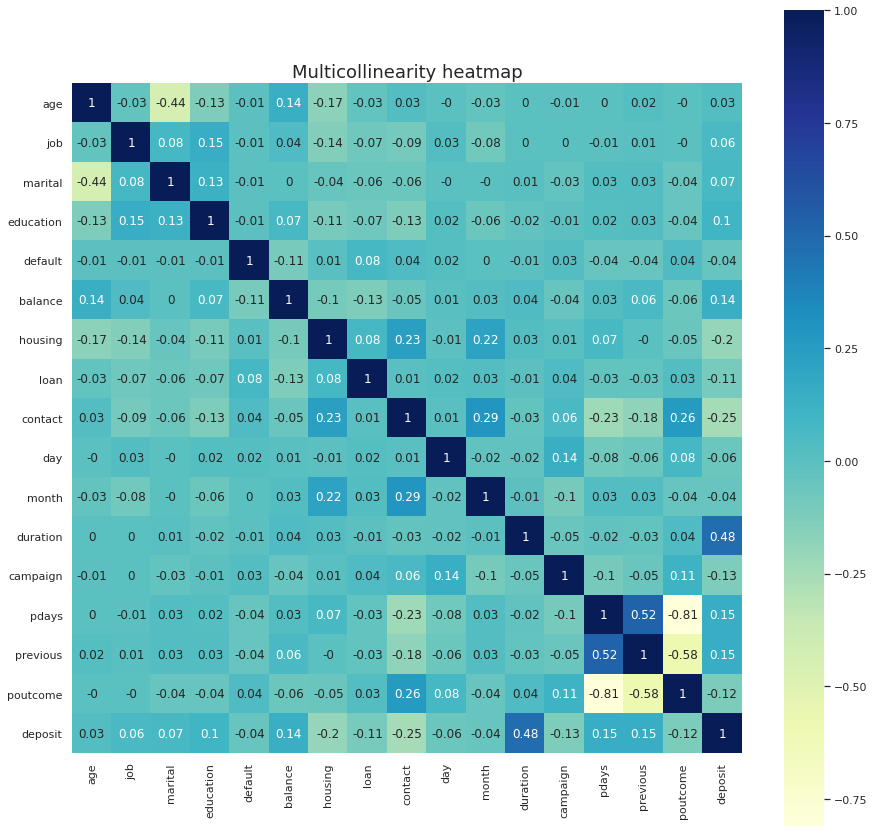

In [75]:
sns.set(rc={'figure.figsize': (15,15)})
sns.heatmap(bank_dm.corr().round(2), square=True, cmap='YlGnBu', annot=True);
plt.title('Multicollinearity heatmap', fontsize=18)

In [130]:
# Convert categorical variable to dummies.
# bank_dm = pd.get_dummies(bank, drop_first=True)
# bank_dm.rename(columns={'deposit_yes': 'deposit'}, inplace=True)
# bank_dm.head()

In [131]:
bank_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [132]:
# Arrange data into a features matrix and target vector
X = bank_dm.drop('deposit', axis=1)
X.shape

(11162, 16)

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
dtypes: int64(16)
memory usage: 1.4 MB


In [134]:
y = bank_dm['deposit']
y.shape

(11162,)

In [135]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [136]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

### 4.2 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
y_lr_model = lr.predict(Xtest)

In [138]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_lr_model, name='predicted')).head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,predicted
0,8650,36,4,1,2,0,1517,1,0,0,11,1,203,1,0,0,3,0,0
1,3155,17,10,2,2,0,838,0,0,0,3,3,647,0,159,1,0,1,1
2,1609,19,9,1,1,0,424,1,0,0,21,0,1192,2,0,0,3,1,1
3,9006,7,7,1,1,0,3079,1,0,0,17,8,175,3,0,0,3,0,0
4,6861,18,4,2,2,0,432,0,0,0,28,5,852,6,0,0,3,0,1


In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_lr_model)

0.7706778142729173

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores_lr = cross_val_score(lr,X,y,cv=5)

In [141]:
print(cv_scores_lr)
print("Logistic Regression mean accuracy score after cross validation:", np.mean(cv_scores_lr))

[0.77832512 0.74429019 0.70519713 0.71684588 0.75582437]
Logistic Regression mean accuracy score after cross validation: 0.7400965398462619


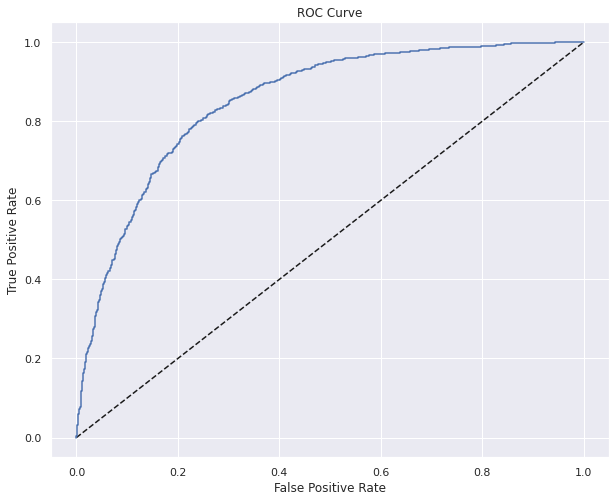

In [142]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(Xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 4.3 Decision tree

In [143]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
y_dt_model = dt.predict(Xtest)

test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_dt_model, name='predicted')).head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,predicted
0,8650,36,4,1,2,0,1517,1,0,0,11,1,203,1,0,0,3,0,0
1,3155,17,10,2,2,0,838,0,0,0,3,3,647,0,159,1,0,1,1
2,1609,19,9,1,1,0,424,1,0,0,21,0,1192,2,0,0,3,1,1
3,9006,7,7,1,1,0,3079,1,0,0,17,8,175,3,0,0,3,0,0
4,6861,18,4,2,2,0,432,0,0,0,28,5,852,6,0,0,3,0,0


In [144]:
accuracy_score(ytest, y_dt_model)

0.7736637802329054

In [145]:
cv_scores_dt = cross_val_score(dt,X,y,cv=5)
print(cv_scores_dt)
print("Decision tree mean accuracy score after cross validation:", np.mean(cv_scores_dt))

[0.69995522 0.68831169 0.75761649 0.77912186 0.76747312]
Decision tree mean accuracy score after cross validation: 0.738495675008467


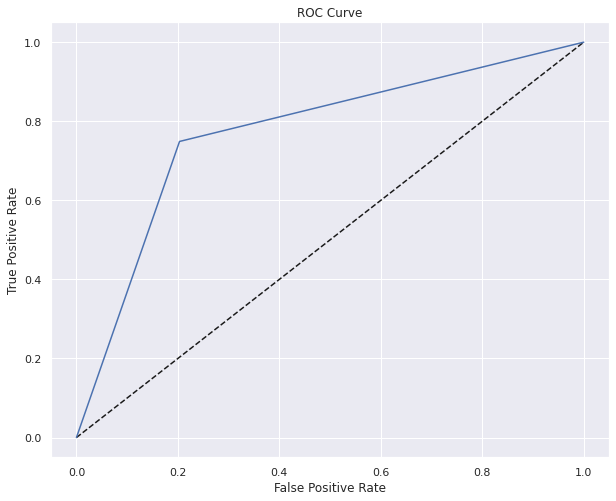

In [146]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt.predict_proba(Xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Hyperparameter tuning with RandomizedSearchCV

In [147]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist,cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 7}
Best score is 0.7606248003633989


### 4.4 Random forest

In [221]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

from sklearn import metrics  
print("Accuracy: ", metrics.accuracy_score(ytest, ypred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(ytest, ypred))
print("Mean Squared Error: ", metrics.mean_squared_error(ytest, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Accuracy:  0.846521349656614
Mean Absolute Error:  0.1534786503433861
Mean Squared Error:  0.1534786503433861
Root Mean Squared Error: 0.3917635132875267


In [223]:
# Cross validation
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print(cv_scores_rf)
print("Random forest mean accuracy score after cross validation:,", np.mean(cv_scores_rf))

[0.76533811 0.76085983 0.81810036 0.85349462 0.83333333]
Random forest mean accuracy score after cross validation:, 0.8062252510806459


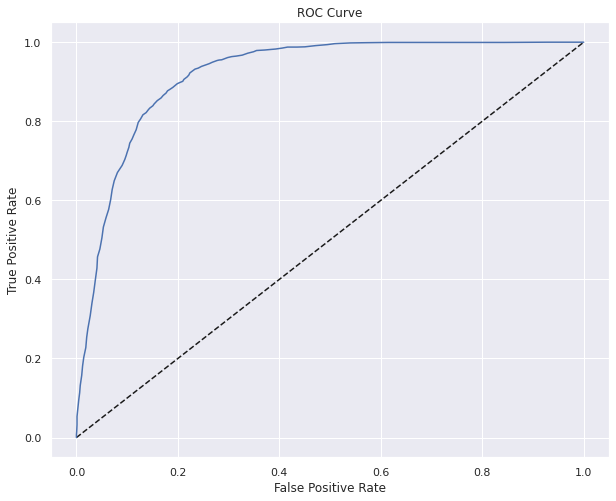

In [224]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(Xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 4.5 KNN

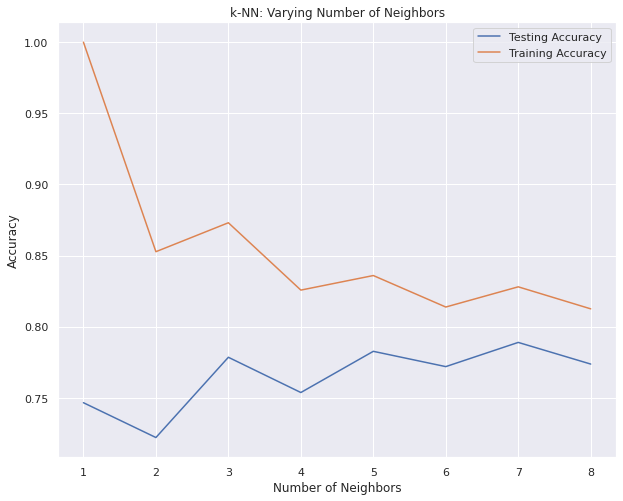

In [152]:
from sklearn.neighbors import KNeighborsClassifier

# try out 1-9 neighbors
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(Xtrain, ytrain)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(Xtrain, ytrain)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(Xtest, ytest)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', )
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Observation:** From the above chart we can determine that 7 neighbors provides the best training accuracy, and therefore we will proceed with 7 neighbors.

In [153]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtrain, ytrain)
y_knn_model = knn.predict(Xtest)

print(knn.score(Xtest, ytest))
print(accuracy_score(ytest, y_knn_model))


0.7888922066288444
0.7888922066288444


In [154]:
cv_scores_knn = cross_val_score(knn, X, y, cv=5)
print(cv_scores_knn)
print("KNN mean accuracy score after cross validation:", np.mean(cv_scores_knn))

[0.80474698 0.7124944  0.70743728 0.74327957 0.75089606]
KNN mean accuracy score after cross validation: 0.7437708565072302


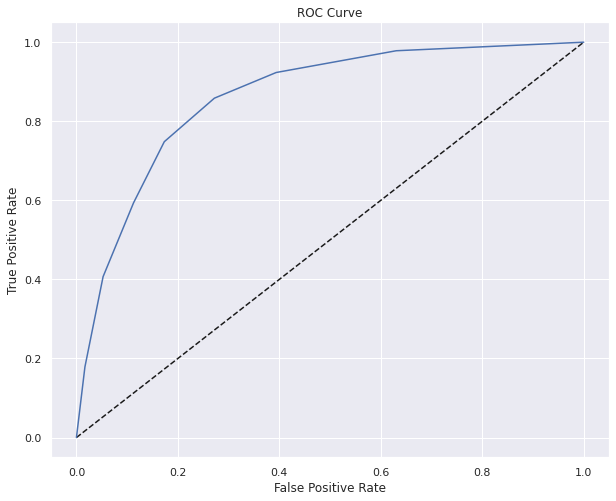

In [155]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(Xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 4.6 Model evaluation

**Accuracy score** of different models:

In [156]:
print("Logistic Regression:", accuracy_score(ytest, y_lr_model))
print("Decision tree:", accuracy_score(ytest, y_dt_model))
print("Random forest:", accuracy_score(ytest, ypred))
print("KNN:", accuracy_score(ytest, y_knn_model))

Logistic Regression: 0.7706778142729173
Decision tree: 0.7736637802329054
Random forest: 0.8486115258286056
KNN: 0.7888922066288444


**Mean accuracy score** of different models after **cross validation**:

In [157]:
print("Logistic Regression:", np.mean(cv_scores_lr))
print("Decision tree:", np.mean(cv_scores_dt))
print("Random forest:", np.mean(cv_scores_rf))
print("KNN:", np.mean(cv_scores_knn))

Logistic Regression: 0.7400965398462619
Decision tree: 0.738495675008467
Random forest: 0.8082857014447671
KNN: 0.7437708565072302


Random forest model has the best accuracy score.

In [158]:
# Check feature importance
feature_imp = pd.Series(rf.feature_importances_, index = list(X.columns)).sort_values(ascending = False)
feature_imp

duration     0.364344
balance      0.091920
age          0.083613
month        0.080610
day          0.073378
contact      0.042727
pdays        0.040038
job          0.039169
poutcome     0.038980
campaign     0.034352
housing      0.031097
previous     0.025387
education    0.023644
marital      0.019035
loan         0.010340
default      0.001366
dtype: float64

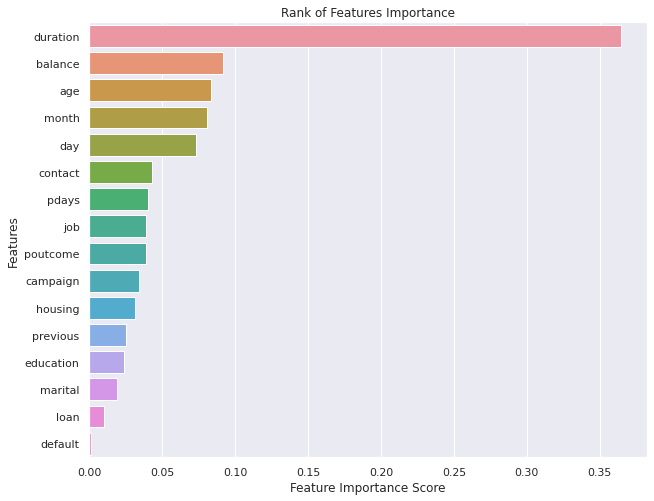

In [159]:
# sns.set(rc={'figure.figsize':(16,10)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Rank of Features Importance")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

**Observation:** From the plot, we can confirm that the most important predictor for our target variable - deposit, is duration(last contact duration).

### 4.7 Model Improvement - Hyperparameter Tuning of Random forest

In [205]:
j=5
accr=[]
rmse=[]
est=[]
while j<=100:
  rf_tune = RandomForestClassifier(n_estimators = j)
  rf_tune.fit(Xtrain, ytrain)
  ypredj = rf_tune.predict(Xtest)
  accr.append(metrics.accuracy_score(ytest, ypredj))
  rmse.append(np.sqrt(metrics.mean_squared_error(ytest, ypredj)))
  est.append(j)
  j=j+5

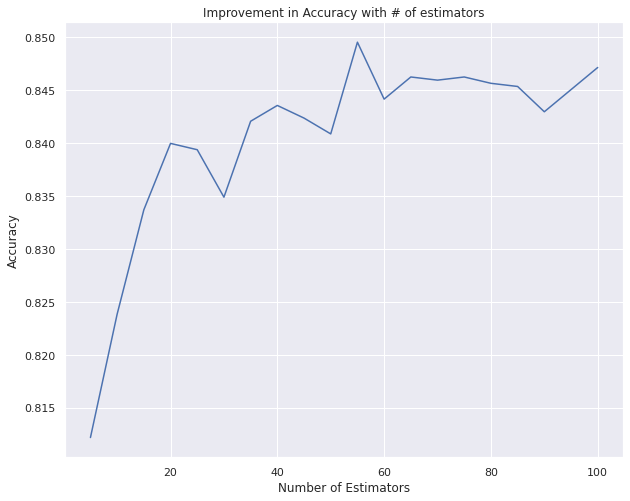

In [206]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x=est, y=accr)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title("Improvement in Accuracy with # of estimators")
plt.show()

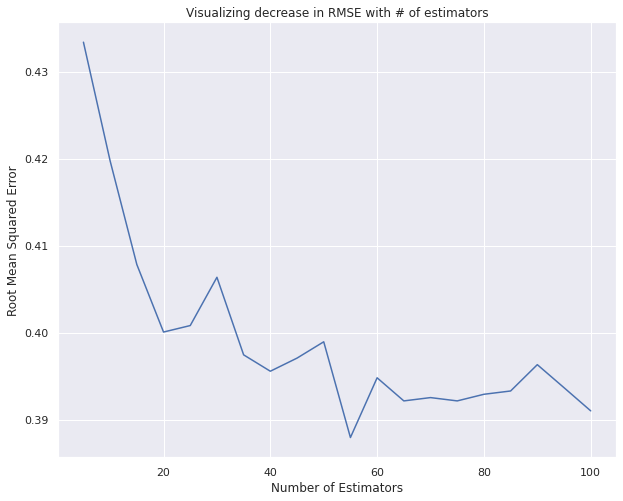

In [207]:
sns.lineplot(x=est, y=rmse)
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error')
plt.title("Visualizing decrease in RMSE with # of estimators")
plt.show()

We are able to determine that a greater number of trees leads to a improvement of accuracy and a decrease in error . This observation holds true until the n_estimator ~ 55 when the trend reverses.

In [230]:
from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(n_estimators = 55)
rf_tuned.fit(Xtrain, ytrain)
ypred2 = rf_tuned.predict(Xtest)

from sklearn import metrics  
print("Accuracy: ", metrics.accuracy_score(ytest, ypred2))
print("Mean Absolute Error: ", metrics.mean_absolute_error(ytest, ypred2))
print("Mean Squared Error: ", metrics.mean_squared_error(ytest, ypred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred2)))

Accuracy:  0.8471185428486115
Mean Absolute Error:  0.15288145715138848
Mean Squared Error:  0.15288145715138848
Root Mean Squared Error: 0.3910005845921314


In [231]:
print('Best model Random forest Test Accuracy:', metrics.accuracy_score(ytest, ypred2))
print('Test Accuracy for model without hyperparameter tuning:', metrics.accuracy_score(ytest, ypred))
print('Improvement in Test Accuracy from hyperparameter tuning:', metrics.accuracy_score(ytest, ypred2) - metrics.accuracy_score(ytest, ypred))


Best model Random forest Test Accuracy: 0.8471185428486115
Test Accuracy for model without hyperparameter tuning: 0.846521349656614
Improvement in Test Accuracy from hyperparameter tuning: 0.0005971931919975804


In [232]:
# Cross validation
cv_scores_rf2 = cross_val_score(rf_tuned, X, y, cv=5)
print(cv_scores_rf2)
print("Random forest mean accuracy score after cross validation:,", np.mean(cv_scores_rf2))

[0.76399463 0.76399463 0.81899642 0.84856631 0.83378136]
Random forest mean accuracy score after cross validation:, 0.8058666676297376


## **5. Summary**

Over the course of this notebook, we developed models to use the bank marketing dataset to predict term deposit subscriptions. To do so, we:
1. Cleaned and preprocessed the initial dataset
2. Performed an exploratory data analysis to discover trends in the data
3. Developed multiple machine learning models and trained them on the dataset
4. Evaluated the success of each model

In sum, we found that our random forest model was the most accurate, and with additional hyperparameter tuning we achieved an accuracy of 80.59%.
